# Correlation

**Correlation (we'll use Pearson's correlation, also called Pearson's r) is a coefficient describing the relationship between two variables that ranges from -1 to 1. A positive correlation indicates that when one is higher, the other also tends to be higher. A negative correlation indicates that when one is higher, the other tends to be lower. A correlation of zero indicates there is no statistical relationship at all between two variables.**

**Correlation provides a way to summarize the relationship between *two interval-level variables* in a single number. It does not take into account other variables that might be causing or mediating the relationship, but it provides a good starting point to think about the relationship between interval variables.**

In [1]:
#Read million songs data from final project folder
import pandas as pd
indata = pd.read_csv('https://raw.githubusercontent.com/ndporter/pythonDiSC/master/finalProject/DiSC_Million_Songs_Data.csv')

In [2]:
#take a look
#notice the mix of interval variables, nominal variables, and desriptive id variables (artist_name, title, release, etc)
indata.head()

,Unnamed: 0,song_id,artist_id,artist_name,artist_familiarity,artist_hotttnesss,title,song_hotttnesss,year,duration,loudness,tempo,artist_mbtags,release,release_7digitalid
0,0,SOMZWCG12A8C13C480,ARD7TVE1187B99BFB1,Casual,0.581794,0.401998,I Didn't Mean To,0.602120,0,218.93179,-11.197,92.198,none,Fear Itself,300848
1,1,SOCIWDW12A8C13D406,ARMJAGH1187FB546F3,The Box Tops,0.630630,0.417500,Soul Deep,NaN,1969,148.03546,-9.843,121.274,classic pop and rock,Dimensions,300822
2,2,SOXVLOJ12AB0189215,ARKRRTF1187B9984DA,Sonora Santanera,0.487357,0.343428,Amor De Cabaret,NaN,0,177.47546,-9.689,100.070,none,Las Numero 1 De La Sonora Santanera,514953
3,3,SONHOTT12A8C13493C,AR7G5I41187FB4CE6C,Adam Ant,0.630382,0.454231,Something Girls,NaN,1982,233.40363,-9.013,119.293,uk,Friend Or Foe,287650
4,4,SOFSOCN12A8C143F5D,ARXR32B1187FB57099,Gob,0.651046,0.401724,Face the Ashes,0.604501,2007,209.60608,-4.501,129.738,none,Muertos Vivos,611336


In [3]:
#reduce dataset for the exercise so it's easier to work with
#the double square brackets allow keeping a subset of columns 
songsData=indata[['artist_familiarity','tempo','duration']]

In [4]:
#pandas has an embedded correlation command that produces a correlation matrix for every set of 2 variables in the data
corrMatr = songsData.corr()

In [5]:
#display the matrix
#the 1s on the diagonal mean that each variable is perfectly correlated with itself
#notice some correlations are positive and others are negative but none appear large
#pandas doesn't provide a significance test with its corr() command
corrMatr

,artist_familiarity,tempo,duration
artist_familiarity,1.000000,0.065946,0.032884
tempo,0.065946,1.000000,-0.009968
duration,0.032884,-0.009968,1.000000


In [6]:
#instead we'll use a command from scipy to find the significance of the single largest correlation we found (artist_familiarity and tempo)
import scipy.stats as stats

In [7]:
#run the procedure, the two columns to be correlated are in the parentheses (order doesn't matter)
stats.pearsonr(songsData['artist_familiarity'],songsData['tempo'])

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:5277: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


(nan, 1.0)

In [8]:
#we apparently have missing data
#let's try again without
songsData=songsData.dropna()

In [14]:
#same command, different results
#the first number returned is the correlation (the same as in corr() above)
#the second number is the statistical significance (p-value)
#remember that the e-NUM notation is scientific and means move the decimal to the left NUM positions
#so our finding is that the correlation is positive and small (0.07) but highly significant
#that is: familiar artists tend to have more up-tempo songs
#the low correlation could result from artists typically having both up and downtempo songs OR
#from a broad range of listener preference OR
#from a measurement artifact such as the zeros that we'll see in the data that are probably missing
stats.pearsonr(songsData['artist_familiarity'],songsData['tempo'])

(0.065945708828000535, 4.1223621649189999e-11)

In [10]:
#Let's see what a correlation looks like when plotted
#these commands allow us to make scatterplots in Jupyter
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

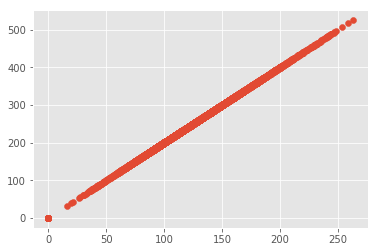

In [11]:
#First, a positive correlation of 1 (between a value and twice the value)
#A negative correlation would look the same but sloped the other direction
plt.scatter(songsData['tempo'],songsData['tempo']*2)
plt.show()

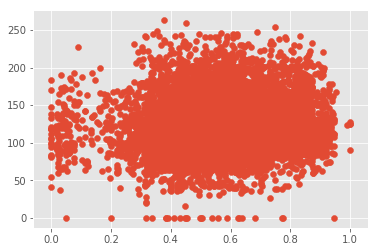

In [12]:
#how about our data for the correlation?
#it's less clear from looking at this that there's a positive correlation AND
#the line would be less steep as a result
#Notice also that there are zeros on both familiarity and tempo that might be missing
plt.scatter(songsData['artist_familiarity'],songsData['tempo'])
plt.show()

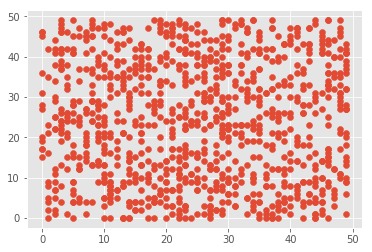

In [13]:
#for completeness, let's create some random numbers to see what a zero correlation looks like
import numpy as np
x = np.random.randint(0,50,1000)
y = np.random.randint(0,50,1000)
plt.scatter(x,y)
plt.show()

When interpreting correlation, state both the value (between -1 and 1) and the p-value (between 0 and 1). If you find a significant correlation, state something like:

*There is a significant positive correlation of 0.07 between artist familiarity and song tempo (p\<0.001).*

Standard vary between disciplines, but one rule of thumb is that a correlation between -0.2 and 0.2 is small, -0.2 to -0.5 or 0.2 to 0.5 is medium, and anything higher is high.